<a href="https://colab.research.google.com/github/meharsg/python/blob/main/ML_Exercises_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Linear Regression in 1 variable

Given csv file with Canada's net national income per capita for a couple of years, predict the net national income for 2020.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import files
uploaded= files.upload()

Saving canada_per_capita_income.csv to canada_per_capita_income.csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['canada_per_capita_income.csv']))

In [ ]:
df.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [ ]:
my_list= list(df)   #to get name of columns in a dataframe
print(my_list)

['year', 'per capita income (US$)']


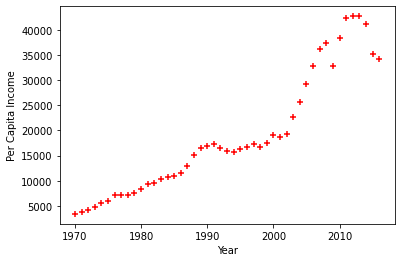

In [ ]:
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.scatter(df.year, df[['per capita income (US$)']], color='red', marker='+')

In [ ]:
reg=linear_model.LinearRegression()    #create object reg for linear regression
reg.fit(df[['year']], df[['per capita income (US$)']] )

In [ ]:
reg.predict([[2020]])

Therefore, predicted value of per capita income for the year 2020 is $41288.69409442

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
plt.scatter(df.year, df[['per capita income (US$)']], color='red', marker='+')
plt.plot(df.year, reg.predict(df[['year']]), color='blue')   #line plot of predicted income values by the model

Now, to evalute the model, we use MSE (mean squared error)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df[['per capita income (US$)']], reg.predict(df[['year']]))   #seems to be some problem with the mse

15462739.061504772

In [ ]:
p= reg.predict(df[['year']])
data_tuples= zip(df.year, reg.predict(df[['year']]))   
d= pd.DataFrame(data_tuples, columns=(['Year', 'per capita income (US$)']))   #year and predicted income added to new dataframe
d.to_csv('predicted_percapitaincome.csv', index=False)    #wrote new df to file

###Linear Regression with multiple variables (Multivariate Regression) and saving model using pickle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import files
uploaded= files.upload()

Saving hiring.csv to hiring.csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['hiring.csv']))

In [ ]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [ ]:
df.shape

(8, 4)

In [ ]:
df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [ ]:
df['experience'].fillna(0, inplace=True)   #replace na values in experience with 0

In [ ]:
df['experience']

0         0
1         0
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [ ]:
df['experience'] = df['experience'].replace([0],'zero')   #replace 0 with zero in experience

In [ ]:
df['experience']

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [ ]:
pip install word2number    #to install the word2number package

  Created wheel for word2number: filename=word2number-1.1-cp37-none-any.whl size=5589 sha256=e41370cedae4f32fe8a5f909355bc210956f102cd73261717e3003734f1a3270
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
Successfully built word2number


In [ ]:
from word2number import w2n
df.experience = df.experience.apply(w2n.word_to_num)   #to convert numbers in word to numeric format

In [ ]:
df.experience

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [ ]:
mean_test_score= df['test_score(out of 10)'].mean()
mean_test_score

7.857142857142857

In [ ]:
import math
mean_test_score= math.floor(mean_test_score)
df['test_score(out of 10)'].fillna(mean_test_score, inplace=True)

In [ ]:
df.head(8)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [ ]:
reg= linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df[['salary($)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.predict([[2, 9, 6]])

array([[53713.86677124]])

In [ ]:
reg.predict([[12, 10, 10]])

array([[93747.79628651]])

Therefore predicted salary for 2 years experience, 9 test score and 6 interview score is $53713.86677124

Predicted salary for 12 yrs experience, 10 test score and 10 interview score is $93747.79628651

In [ ]:
import pickle
with open('model_pickle', 'wb') as f:    #write binary to file model_pickle
  pickle.dump(reg, f)   #write model reg to file

In [ ]:
with open('model_pickle', 'rb') as f:   #read binary file model_pickle
  mp = pickle.load(f)

In [ ]:
mp.predict([[12, 10, 10]])

array([[93747.79628651]])

###Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files
import math
from sklearn.linear_model import LinearRegression

In [ ]:
uploaded= files.upload()

Saving test_scores.csv to test_scores.csv


In [ ]:
df= pd.read_csv(io.BytesIO(uploaded['test_scores.csv']))

In [ ]:
def gradient_descent(x,y):
  m_curr = b_curr = 0
  iterations = 100000
  n = len(x)
  learning_rate = 0.0002
  cost_previous = 0
  for i in range(iterations):
    y_predicted = m_curr*x + b_curr
    md = -(2/n)*sum(x*(y - y_predicted))
    bd = -(2/n)*sum(y - y_predicted)
    m_curr = m_curr - learning_rate*md
    b_curr = b_curr - learning_rate*bd
    cost = (1/n)*sum([val**2 for val in (y - y_predicted)])
    if math.isclose(cost, cost_previous, rel_tol=1e-20):
      break
    cost_previous = cost
    print('m= {}, b= {}, cost= {}, iter= {}'.format(m_curr, b_curr, cost, i))
  return m_curr, b_curr

def predict_using_sklearn():
  reg = LinearRegression()
  reg.fit(df[['math']], df[['cs']])
  return reg.coef_, reg.intercept_

if __name__ == "__main__":
  x = np.array(df.math)
  y = np.array(df.cs)

  m, b = gradient_descent(x, y)
  print('Using gradient descent function: Coef= {}, Intercept= {}'.format(m, b))

  m_sk, b_sk = predict_using_sklearn()
  print('Using sklearn: Coef= {}, Intercept= {}'.format(m_sk, b_sk))



Streaming output truncated to the last 5000 lines.
m= 1.0207644228926334, b= 1.7006196980187966, cost= 31.60715517306052, iter= 95002
m= 1.0207643533720805, b= 1.700624624759898, cost= 31.607155051668272, iter= 95003
m= 1.0207642838531243, b= 1.700629551387892, cost= 31.60715493028161, iter= 95004
m= 1.0207642143357636, b= 1.7006344779027813, cost= 31.60715480890053, iter= 95005
m= 1.0207641448199993, b= 1.7006394043045685, cost= 31.607154687525004, iter= 95006
m= 1.0207640753058305, b= 1.7006443305932564, cost= 31.607154566155057, iter= 95007
m= 1.020764005793258, b= 1.7006492567688474, cost= 31.60715444479069, iter= 95008
m= 1.0207639362822811, b= 1.700654182831344, cost= 31.6071543234319, iter= 95009
m= 1.0207638667729002, b= 1.7006591087807488, cost= 31.60715420207867, iter= 95010
m= 1.0207637972651147, b= 1.7006640346170645, cost= 31.60715408073103, iter= 95011
m= 1.0207637277589257, b= 1.7006689603402938, cost= 31.607153959388956, iter= 95012
m= 1.0207636582543314, b= 1.700673885

###One Hot Encoding

**1. Using Pandas to create dummy variables**

In [ ]:
import pandas as pd
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving carprices.csv to carprices (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['carprices.csv']))
df

In [ ]:
dummies = pd.get_dummies(df[['Car Model']])   #to create dummy variables
dummies

In [ ]:
merged = pd.concat([df, dummies], axis='columns')   #concatenating df and dummies dataframe
merged

In [ ]:
merged

In [ ]:
final = merged.drop(['Car Model', 'Car Model_Audi A5'], axis='columns')   #drop categorical variable and 1 dummy 
final                                                                          #variable to avoid dummy variable trap

In [ ]:
X = final.drop(['Sell Price($)'], axis='columns')

In [ ]:
X

In [ ]:
y = final['Sell Price($)']
y

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.predict([[45000, 4, 0, 1]])   #mercedez benz, 4yrs old, 45000 mileage

array([36991.31721061])

In [ ]:
reg.predict([[86000, 7, 1, 0]])   #bmw, 7yrs old, 86000 mileage

array([11080.74313219])

In [ ]:
reg.score(X, y)   #to measure accuracy of model

0.9417050937281083

Therefore, model makes following predictions:

1. Price of mercedez, 4yrs old with 45000 mileage: $36991.31721061   

2. Price of bmw, 7yrs old with 86000 mileage: $11080.74313219

And accuracy of model is 94.17050937281083%

**2. Using sklearn OneHotEncoder**




In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])

In [ ]:
df

In [ ]:
X = dfle[['Car Model', 'Mileage', 'Age(yrs)']].values
X

In [ ]:
y = dfle[['Sell Price($)']].values
y

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()  

In [ ]:
ohe.fit_transform(X).toarray()

In [ ]:
X = X[:, 1:]   #to drop 1st column to avoid dummy variable trap (even though linearregression will automatically adjust for it)
X

In [ ]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Decision Tree

In [ ]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
df= pd.read_csv(io.BytesIO(uploaded['titanic.csv']))

In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [ ]:
inputs = df.drop('Survived', axis='columns')
target = df.Survived

In [ ]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [ ]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(X_test, y_test)

0.8212290502793296

Therefore, our model is 82% accurate.

###Support Vector Machine (SVM)

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

>1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(digits.data, digits.target)
df

In [ ]:
df['target'] = digits.target
df

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), df.target, test_size=0.2)

**Using RBF Kernel**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_rbf = SVC(kernel='rbf')

In [ ]:
model_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_rbf.score(X_test, y_test)

0.9833333333333333

**Using Linear Kernel**

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_linear.score(X_test, y_test)

0.9805555555555555

###Random Forest

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

>1. Measure prediction score using default n_estimators (10)
2.  Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

In [ ]:
df['target'] = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), df.target, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(X_test, y_test)

1.0

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

Text(69.0, 0.5, 'Truth')

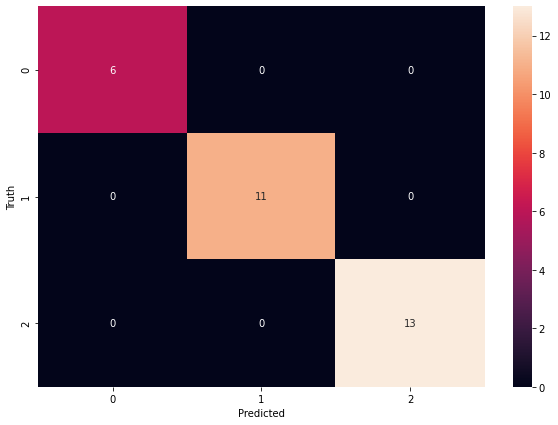

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')